# HR Analytics Project - Predict Employee Attrition
### Objective: Understand the main causes of employee resignation and predict future attrition.

**Tools**: Python (Pandas, Seaborn, Sklearn, SHAP), Power BI

----

## Step 1: Import Libraries

In [3]:
!pip install scikit-learn shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import shap

## Step 2: Load Dataset

In [4]:
# Load your dataset here
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  # Update filename if needed
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Step 3: Data Cleaning
**Remove columns which are constant or identifiers and don't help in prediction**
- Drop: EmployeeCount, Over18, StandardHours, EmployeeNumber
- Check for Missing Values
- Encode target column 'Attrition' to binary (Yes=1, No=0)

In [5]:
# Drop unnecessary columns
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

# Check missing values
print(df.isnull().sum())  # Should be 0 for IBM dataset

# Encode 'Attrition' (target variable)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## Step 4: Exploratory Data Analysis (EDA)
- Department-wise Attrition
- Salary bands vs Attrition
- Overtime vs Attrition
- Promotions vs Attrition

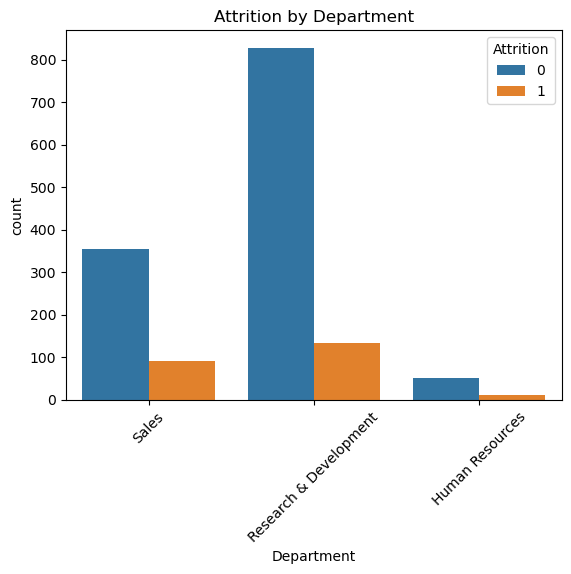

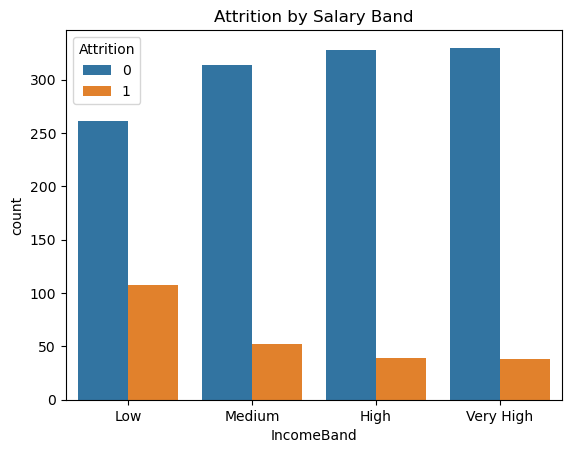

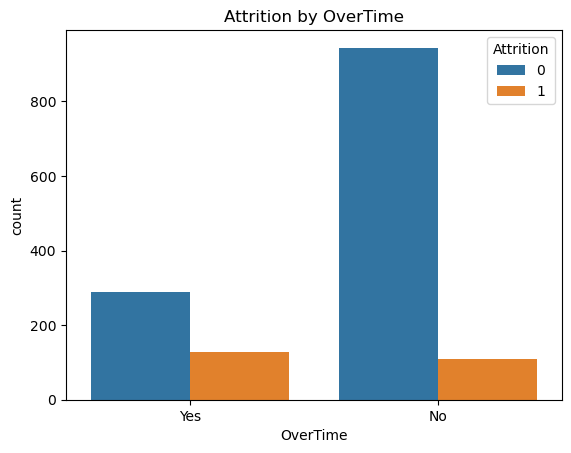

In [6]:
# Department-wise Attrition
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

# Salary bands (MonthlyIncome)
df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(data=df, x='IncomeBand', hue='Attrition')
plt.title('Attrition by Salary Band')
plt.show()

# OverTime vs Attrition
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition by OverTime')
plt.show()

## Step 5: Data Preprocessing
- Encode Categorical Variables
- Scale Numerical Features
- Train-Test Split

In [7]:
# Encode Categorical Variables
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Separate Features and Target
X = df.drop(['Attrition', 'IncomeBand'], axis=1)  # Drop IncomeBand (EDA only)
y = df['Attrition']

# Scale Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## Step 6: Model Building
### Logistic Regression and Decision Tree Classifier

In [8]:
# Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

## Step 7: Model Evaluation

In [9]:
# Logistic Regression Evaluation
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Decision Tree Evaluation
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.7482993197278912
[[191  56]
 [ 18  29]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       247
           1       0.34      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.77       294

Decision Tree Accuracy: 0.7721088435374149
[[202  45]
 [ 22  25]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       247
           1       0.36      0.53      0.43        47

    accuracy                           0.77       294
   macro avg       0.63      0.67      0.64       294
weighted avg       0.81      0.77      0.79       294



## Step 8: SHAP Value Analysis (Explainability)

C:\Users\sushmita\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sushmita\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:758: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0, w_pad=0, h_pad=0.0)


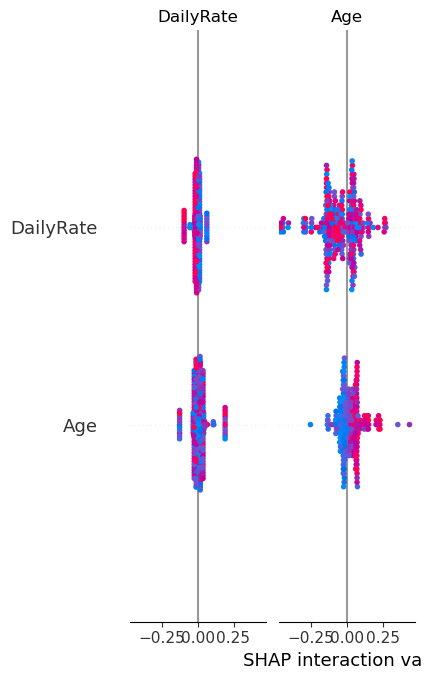

In [10]:
# SHAP Analysis for Decision Tree
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)